In [1]:
!pip install seaborn
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

     |████████████████████████████████| 215 kB 3.1 MB/s eta 0:00:01


In [2]:
test=pd.read_csv('data/test.csv')
train=pd.read_csv('data/train.csv')

tweet_id - Unique id for tweets. tweet - Tweet about the brand/product sentiment - 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

In [3]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [4]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [5]:
test.isnull().any()

tweet_id    False
tweet       False
dtype: bool

In [6]:
train.isnull().any()

tweet_id     False
tweet         True
sentiment    False
dtype: bool

In [7]:
#Removing null value from training data
train.dropna(inplace=True)

In [8]:
train.isnull().any()

tweet_id     False
tweet        False
sentiment    False
dtype: bool

In [9]:

# checking out the negative comments from the train set

train[train['sentiment'] == 0].head(10)

,tweet_id,tweet,sentiment
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
24,634,.@mention I have a 3G iPhone. After 3 hrs twee...,0
34,1178,So I went the whole day w/out my laptop &amp; ...,0
50,5058,RT @mention 'Google lost its way by caring too...,0
63,2435,I composed a tweet so acerbic and cynical abou...,0
68,3850,@mention is about to talk about the mistakes h...,0
80,180,"You spent $1,000+ to come to SXSW. \r\n\r\nYou...",0
128,4606,My tweeting from #sxsw been pretty non existen...,0
142,4454,Sitting on the floor behind a guy who's fondli...,0
223,7186,&quot;No other reason for Apple's continued su...,0


In [10]:
# checking out the Neutral comments from the train set

train[train['sentiment'] == 1].head(10)

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
4,3604,Line outside the Apple store in Austin waiting...,1
5,966,#technews One lone dude awaits iPad 2 at Apple...,1
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1
13,6909,RT @mention We're officially at #SXSW! Come by...,1
14,7917,"#Companies to watch, from the #SXSW trade show...",1
15,5849,"RT @mention Google Marissa Mayer, future of lo...",1
16,1955,DL the #Calyp App to get into #Calyp Casa at #...,1


In [11]:
# checking out the positive comments from the train set

train[train['sentiment'] == 2].head(10)

,tweet_id,tweet,sentiment
2,2689,one of the most in-your-face ex. of stealing t...,2
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,883,I think I might go all weekend without seeing ...,2
11,2369,It's official! I'm buying an iPad. #SXSW #elevate,2
12,3944,"They're giving away iPad 2's, x boxes and book...",2
17,1472,Well yeah. Music &gt; iPhone nerds RT @mentio...,2
22,1352,_¼ÛÄ___ü ___¡ _____«_µ... &gt;&gt; @mention...,2
23,6431,RT @mention P.S. @mention and Google throw a b...,2
31,2491,All Packed. A few too many #Apple devices. Ala...,2
32,1993,"Check in and offers through Google, cool. {lin...",2


In [12]:
# checking out the Can't tell comments from the train set

train[train['sentiment'] == 3].head(10)

,tweet_id,tweet,sentiment
10,6398,RT @mention Official #SXSW App Û÷SXSW GOÛª b...,3
28,5368,standing on a long line surrounded by unemploy...,3
123,4618,Google/Bing search smackdown panel is in a gia...,3
133,7469,Original products for 1 device is nuts. #sxsw....,3
242,2116,iPhone crashed in front of #sxsw Apple pop-up....,3
265,3298,&quot;Google products need to be condensed&quo...,3
320,3855,"@mention is biyt.ly for email, like google voi...",3
340,9020,It's funny watching a room full of people hold...,3
354,3894,the panelist from Texas Observer called the iP...,3
384,2263,Any blackberry apps for #sxsw ?? Pls let @ment...,3


 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

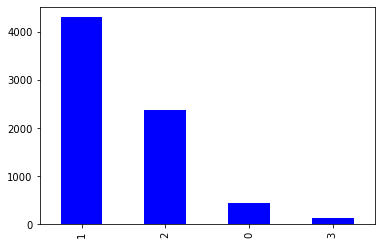

In [13]:
train['sentiment'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

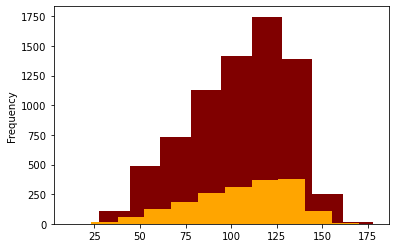

In [14]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'maroon', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [15]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,tweet_id,tweet,sentiment,len
0,1701,#sxswnui #sxsw #apple defining language of tou...,1,89
1,1851,Learning ab Google doodles! All doodles should...,1,143
2,2689,one of the most in-your-face ex. of stealing t...,2,132
3,4525,This iPhone #SXSW app would b pretty awesome i...,0,125
4,3604,Line outside the Apple store in Austin waiting...,1,77
5,966,#technews One lone dude awaits iPad 2 at Apple...,1,115
6,1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1,82
7,8182,NU user RT @mention New #UberSocial for #iPhon...,1,119
8,8835,Free #SXSW sampler on iTunes {link} #FreeMusic,2,46
9,883,I think I might go all weekend without seeing ...,2,79


In [16]:
train.groupby('sentiment').describe()

tweet_id                                                            \
             count         mean          std   min      25%     50%      75%   
sentiment                                                                      
0            456.0  4293.050439  2520.992821   3.0  2315.00  4087.0  6354.25   
1           4310.0  4603.535499  2616.305071  16.0  2305.25  4757.5  6832.50   
2           2382.0  4442.824517  2631.027356   2.0  2186.25  4292.5  6756.75   
3            125.0  4657.368000  2671.051401  90.0  2472.00  4297.0  7176.00   

                      len                                                   \
              max   count        mean        std   min   25%    50%    75%   
sentiment                                                                    
0          9080.0   456.0  108.923246  27.681640  38.0  90.0  114.0  132.0   
1          9092.0  4310.0  104.024362  27.106155  11.0  85.0  108.0  125.0   
2          9088.0  2382.0  105.845088  27.222911  25.0  87.0  110.0  127.0   
3          9066.0   125.0  101.784000  27.686489  43.0  80.0  102.0  125.0   

                  
             max  
sentiment         
0          158.0  
1          178.0  
2          170.0  
3          152.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50')

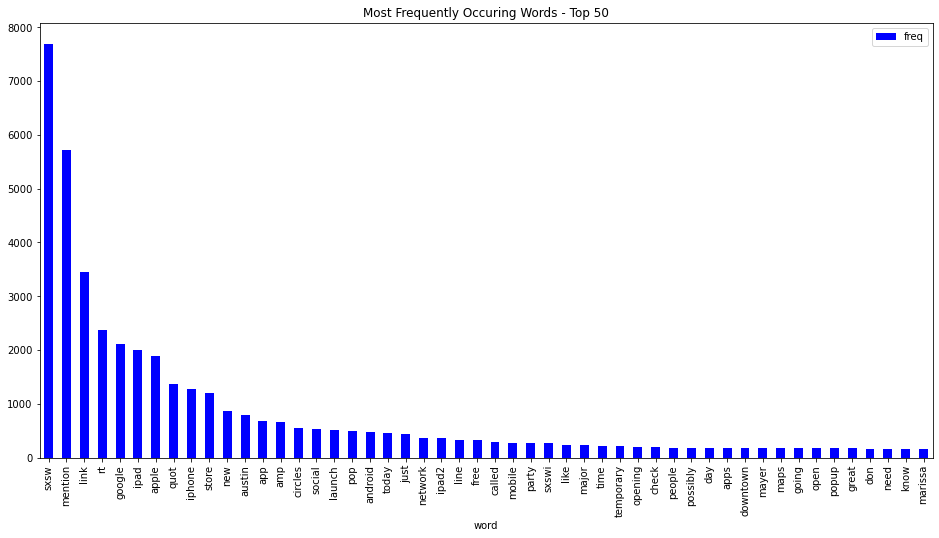

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(50).plot(x='word', y='freq', kind='bar', figsize=(16, 8), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 50")

     |████████████████████████████████| 364 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 17.7 MB/s eta 0:00:01


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

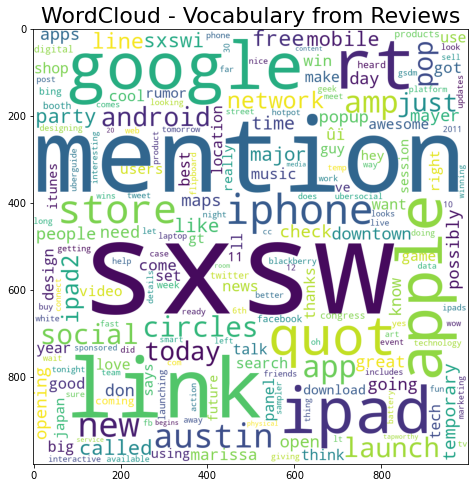

In [18]:
!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

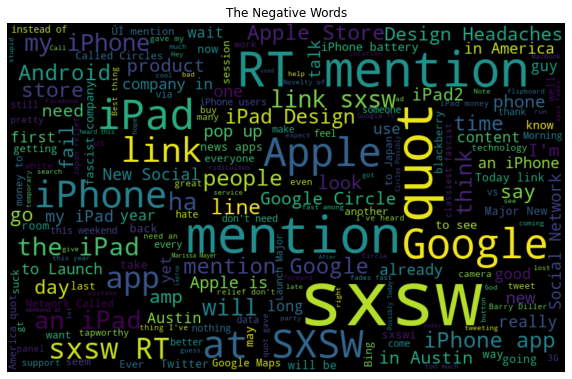

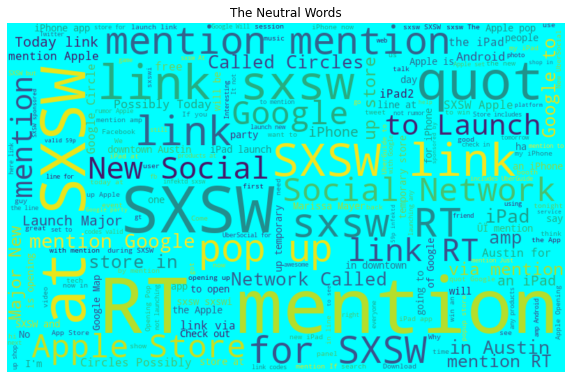

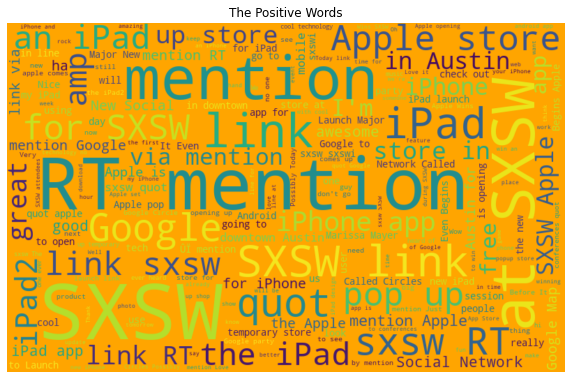

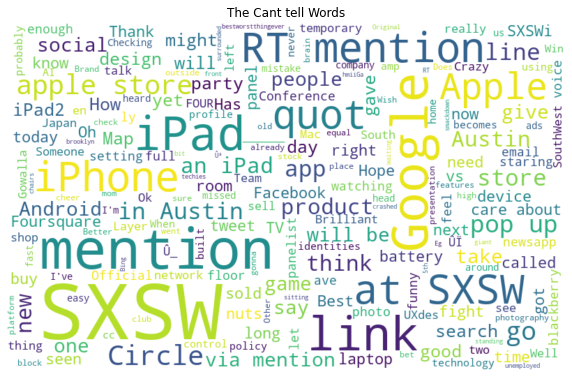

In [19]:
negative_words =' '.join([text for text in train['tweet'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

neutral_words =' '.join([text for text in train['tweet'][train['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

positive_words =' '.join([text for text in train['tweet'][train['sentiment'] == 2]])

wordcloud = WordCloud(background_color = 'orange', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

canttell_words =' '.join([text for text in train['tweet'][train['sentiment'] == 3]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(canttell_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Cant tell Words')
plt.show()


In [20]:
tweets=train['tweet']

In [21]:
tweet=''.join([str(i) for i in tweets])

In [22]:
from nltk.tokenize import TweetTokenizer
tweet_tk=TweetTokenizer()

In [23]:
token_tweet=tweet_tk.tokenize(tweet)

words = [word.lower() for word in token_tweet]


In [24]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
train_corpus = []

for i in range(0,len(train)):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'].iloc[i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [26]:
test_corpus = []

for i in range(0, len(test)):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [27]:
# creating bag of words for train

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(7273, 2500)
(7273,)


In [28]:

# creating bag of words for test

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(1819, 2500)


In [29]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5454, 2500)
(1819, 2500)
(5454,)
(1819,)


In [30]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [ ]:
company_counts=['google','iphone','samsung','blackberry','nokia']

In [ ]:
dictionary={'google':0,'iphone':0,'samsung':0,'blackberry':0,'nokia':0}
for i in words:
    for j in company_counts:
        if i == j:
            count=dictionary[j]
            count=count+1
            dictionary.update({j:count})
            
            

In [ ]:
dictionary

In [ ]:
words